# Download GDP Data

Before getting started, be sure to reference [BEA API for Data Retrieval](https://apps.bea.gov/api/_pdf/bea_web_service_api_user_guide.pdf) open.

First we will want to [sign up](https://apps.bea.gov/api/signup/) to use the BEA API. After signing up, you will receive a key that you can use to download data.

In [1]:
# !pip install datapungibea

import datapungibea as dpb
key = '1FD5DC35-4854-4CE8-8D43-B36065C37041'
data = dpb.data(key) 
data

In [2]:
data._help

'\n         Userguides:\n          NOTE: Datasets RegionalIncome and RegionalProduct were deprecated, use Regional instead. \n          \n          https://apps.bea.gov/api/_pdf/bea_web_service_api_user_guide.pdf\n          https://www.bea.gov/tools/   or  https://apps.bea.gov/API/signup/index.cfm\n         \n          Basically, there are three types of meta (the first three tabs): \n            (1) GETDATASETLIST      top level, get the name of all tables.  \n            (2) GetParameterList    given a table, what parameters it needs to download (eg. NIPA)\n            (3) GetParameterValues  given a parameter of a table, which values you can choose. (eg. TableID)\n           \n            Use them to get: name of datasets, their paramaters, and the values of the parameters.  These \n            can be used in the searches of individual datasets (in the other tabs)  \n\n         Sample python code (getting the list of datasets):\n         \n            import requests \n            p

## Get comfortable donwloading data using national production measures.


### It will be useful to refences [BEA API for Data Retrieval description of the NIPA method](https://apps.bea.gov/api/_pdf/bea_web_service_api_user_guide.pdf#page=17). \_docDriver() also provides useful notes for the _datapungibea_ module.

In [3]:
data._docDriver("NIPA")

"\n        Get National Income and Product Account (NIPA) data. Most parameters are set to deafault values; passing \n        tableName will return a value of quarterly data in all available years.  Sample run -\n          NIPA('T10101')  \n          NIPA('T10101', frequency = 'A', year='X',verbose=True,includeIndentation=False)\n            \n        Args:\n            tableName (str): name of NIPA table, for example T10101\n            frequency (str): frequency of data - Annual (A), quarterly (Q) or monthly (M); default to Q\n            year (str): specific year or X for all years -  eg, '2019' or 'X'; default to X\n            payload (dict): this is the base request information of a BEA NIPA query; default - {'method': 'GETDATA', 'DATABASENAME': 'NIPA', 'datasetname': 'NIPA', 'ParameterName': 'TableID'}\n            outputFormat (str): tablePretty will clean up data and return pandas of variable by date; else returns table of (variable,date) by data; default to tablePretty\n     

In [4]:
data.NIPA('T10101', includeIndentations = True)  


,,,1947Q2,1947Q3,1947Q4,1948Q1,1948Q2,1948Q3,1948Q4,1949Q1,1949Q2,1949Q3,...,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2
LineNumber,SeriesCode,LineDescription,,,,,,,,,,,,,,,,,,,,,
1,A191RL,Gross domestic product,-1.1,-0.8,6.4,6.2,6.8,2.3,0.5,-5.4,-1.4,4.2,...,6.3,7.0,2.7,7.0,-1.6,-0.6,3.2,2.6,2.0,2.1
2,DPCERL,Personal consumption expenditures,6.8,1.3,0.1,2.0,4.7,0.6,3.2,0.7,6.3,0.9,...,10.8,12.1,3.0,3.1,1.3,2.0,2.3,1.0,4.2,1.7
3,DGDSRL,-Goods,7.4,2.7,1.5,0.6,3.7,-0.4,2.7,-0.6,9.1,2.1,...,25.3,11.6,-7.9,2.3,-0.1,-2.6,-0.4,-0.1,6.0,0.7
4,DDURRL,--Durable goods,8.7,5.6,28.6,-2.0,2.7,7.0,-5.5,-7.1,39.4,20.5,...,44.7,10.6,-22.0,5.1,7.6,-2.8,-0.8,-1.3,16.3,-0.3
5,DNDGRL,--Nondurable goods,7.0,1.9,-5.1,1.3,4.0,-2.4,5.3,1.6,1.1,-3.5,...,14.9,12.2,1.7,0.7,-4.4,-2.5,-0.1,0.6,0.5,1.2
6,DSERRL,-Services,5.9,-0.8,-2.1,4.3,6.4,2.1,4.1,2.5,2.0,-0.8,...,4.0,12.3,9.2,3.5,2.1,4.6,3.7,1.6,3.2,2.2
7,A006RL,Gross private domestic investment,-27.3,-11.3,102.9,47.8,27.1,4.2,-17.8,-47.6,-43.5,37.5,...,-5.4,0.9,10.4,32.0,5.4,-14.1,-9.6,4.5,-11.9,3.3
8,A007RL,-Fixed investment,-10.0,13.6,37.2,13.4,-0.6,-4.0,-4.5,-20.4,-11.6,-0.7,...,9.7,5.8,-1.1,0.6,4.8,-5.0,-3.5,-3.8,-0.4,3.9
9,A008RL,--Nonresidential,-6.1,-7.2,11.6,25.3,-12.7,1.0,9.7,-17.1,-14.1,-17.1,...,8.9,9.9,0.6,1.1,7.9,0.1,6.2,4.0,0.6,6.1


## We want to download county level data using the .Regional() method.
It will be useful to refences [BEA API for Data Retrieval description of the Regional method](https://apps.bea.gov/api/_pdf/bea_web_service_api_user_guide.pdf#page=57). As with NIPA, we can use _.docDriver()_ to access information about the Regional method.

In [5]:
print(data._docDriver('Regional'))


        Query the IntlServTrade database (API query)  
        Sample run -
         
        
        Args:
            GeoFips (str): eg
            LineCode (str): eg
            TableName (str): eg 
            Year (str): eg 'X' for all or '2019'
            payload (dict): request default {'method': 'GETDATA',  'datasetname': 'Regional'},
            verbose (bool): if returns that data in a pandas dataframe format or all available information; default to False
        Returns:
            output: either a pandas dataframe or a dictionary (verbose=True) with dataFrame, request, and code              
        


## Since we want to download county level GDP data, we will use values from CAGDP9. To automate data collection, we will need to collect the county FIPS values and the full set of variables contained in CAGDP9. First we will create a list of  county fips.

In [8]:
# Collect county level variables
for_county_index = data.Regional(GeoFips = "COUNTY",
              LineCode = "1",
              TableName = "CAGDP9", 
              Year = "2010")
for_county_index

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

## Next we make a list of GDP components

In [7]:
counties = for_county_index["GeoFips"]
counties

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3113    56037
3114    56039
3115    56041
3116    56043
3117    56045
Name: GeoFips, Length: 3118, dtype: object

In [8]:
for_GDP_components = data.Regional(GeoFips = "01001",
              LineCode = "ALL",
              TableName = "CAGDP9", 
              Year = "2010")
for_GDP_components

,Code,GeoFips,GeoName,TimePeriod,Description,CL_UNIT,UNIT_MULT,DataValue,NoteRef
0,CAGDP9-1,01001,"Autauga, AL",2010,All industry total,Thousands of chained 2012 dollars,3,"1,286,603",NaN
1,CAGDP9-2,01001,"Autauga, AL",2010,Private industries,Thousands of chained 2012 dollars,3,"1,091,357",NaN
2,CAGDP9-3,01001,"Autauga, AL",2010,"Agriculture, forestry, fishing and hunting",Thousands of chained 2012 dollars,3,"25,844",NaN
3,CAGDP9-6,01001,"Autauga, AL",2010,"Mining, quarrying, and oil and gas extraction",Thousands of chained 2012 dollars,3,"9,415",NaN
4,CAGDP9-10,01001,"Autauga, AL",2010,Utilities,Thousands of chained 2012 dollars,3,"204,705",NaN
5,CAGDP9-11,01001,"Autauga, AL",2010,Construction,Thousands of chained 2012 dollars,3,"39,798",NaN
6,CAGDP9-12,01001,"Autauga, AL",2010,Manufacturing,Thousands of chained 2012 dollars,3,"212,608",NaN
7,CAGDP9-13,01001,"Autauga, AL",2010,Durable goods manufacturing,Thousands of chained 2012 dollars,3,(D),(D)
8,CAGDP9-25,01001,"Autauga, AL",2010,Nondurable goods manufacturing,Thousands of chained 2012 dollars,3,(D),(D)
9,CAGDP9-34,01001,"Autauga, AL",2010,Wholesale trade,Thousands of chained 2012 dollars,3,"45,831",NaN


In [9]:
GDP_components = for_GDP_components[["Code", "Description"]]
GDP_components

,Code,Description
0,CAGDP9-1,All industry total
1,CAGDP9-2,Private industries
2,CAGDP9-3,"Agriculture, forestry, fishing and hunting"
3,CAGDP9-6,"Mining, quarrying, and oil and gas extraction"
4,CAGDP9-10,Utilities
5,CAGDP9-11,Construction
6,CAGDP9-12,Manufacturing
7,CAGDP9-13,Durable goods manufacturing
8,CAGDP9-25,Nondurable goods manufacturing
9,CAGDP9-34,Wholesale trade


In [10]:
import time
import random

GDP_data_dct = {}

In [11]:
# for row in GDP_components.iterrows():
#     full_code, description = row[1]
#     table_name, code = full_code.split("-")
   
#     try:
#         GDP_data_dct[description] = data.Regional(GeoFips = "COUNTY",
#               LineCode = code,
#               TableName = table_name, 
#               Year = "ALL")
#         print(full_code +": " + description + " downloaded")
#     except:
#         print(full_code +": Error downloading " + description)
#     time.sleep(10)

## Next let's save the data. We do because it is good practice to only redownload a dataset if it has recently been updated. It is particularly important in this case since the  datasets are greater than 5 MB each.

In [12]:
# !pip install descartes
import geopandas
import numpy as np
import pandas as pd
# We won't actually use datetime directly. Since the dataframe index will use 
# data formatted as datetime64, I import it in case I need to use the datetime
# module to troubleshoot later 
import datetime
# you could technically call many of the submodules from matplotlib using mpl., 
#but for convenience we explicitly import submodules. These will be used for 
# constructing visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
# If you choose to make a dynamic visualization for the homework
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick


In [13]:
import os
folder1 = "Data"
folder2 = "CountyGDP"
try:
    os.mkdir(folder1)
    os.mkdir(folder1 + "/" + folder2)
except:
    try: 
        os.mkdir(folder1 + "/" + folder2)
    except:
        pass
# for key, val in GDP_data_dct.items():
#     val.to_csv(folder1 + "/" + folder2 + "/" + key.replace("/","") + ".csv")

for row in GDP_components.iterrows():
    full_code, description = row[1]
    GDP_data_dct[description] = pd.read_csv("Data/CountyGDP/" + description.replace("/","") + ".csv")
GDP_data_dct
    

{'All industry total':        Unnamed: 0      Code  GeoFips      GeoName  TimePeriod  \
 0               0  CAGDP9-1     1001  Autauga, AL        2001   
 1               1  CAGDP9-1     1001  Autauga, AL        2002   
 2               2  CAGDP9-1     1001  Autauga, AL        2003   
 3               3  CAGDP9-1     1001  Autauga, AL        2004   
 4               4  CAGDP9-1     1001  Autauga, AL        2005   
 ...           ...       ...      ...          ...         ...   
 62355       62355  CAGDP9-1    56045   Weston, WY        2016   
 62356       62356  CAGDP9-1    56045   Weston, WY        2017   
 62357       62357  CAGDP9-1    56045   Weston, WY        2018   
 62358       62358  CAGDP9-1    56045   Weston, WY        2019   
 62359       62359  CAGDP9-1    56045   Weston, WY        2020   
 
                                  CL_UNIT  UNIT_MULT  DataValue NoteRef  
 0      Thousands of chained 2012 dollars          3    949,800     NaN  
 1      Thousands of chained 2012 do

In [14]:
full_df = pd.DataFrame({key: val.set_index(["GeoFips", "TimePeriod"])["DataValue"] for key, val in GDP_data_dct.items()})
full_df

All industry total Private industries  \
GeoFips TimePeriod                                         
1001    2001                  949,800            811,076   
        2002                  984,039            831,984   
        2003                1,008,032            847,951   
        2004                1,170,278            993,804   
        2005                1,195,319          1,018,262   
...                               ...                ...   
56045   2016                  305,446            249,240   
        2017                  300,909            245,348   
        2018                  315,332            258,211   
        2019                  322,576            267,124   
        2020                  312,665            257,082   

                   Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                              
1001    2001                                           22,455   
        2002                                           18,063   
        2003                                           39,941   
        2004                                           49,903   
        2005                                           59,099   
...                                                       ...   
56045   2016                                           13,871   
        2017                                           19,901   
        2018                                           23,787   
        2019                                           14,194   
        2020                                            8,653   

                   Mining, quarrying, and oil and gas extraction Utilities  \
GeoFips TimePeriod                                                           
1001    2001                                               4,644    23,121   
        2002                                               3,053    53,320   
        2003                                               3,696    57,076   
        2004                                               5,917    94,578   
        2005                                               7,513    74,428   
...                                                          ...       ...   
56045   2016                                              35,145       762   
        2017                                              34,812       742   
        2018                                              42,804       792   
        2019                                              52,783       963   
        2020                                              37,766       875   

                   Construction Manufacturing Durable goods manufacturing  \
GeoFips TimePeriod                                                          
1001    2001            111,710       211,416                         (D)   
        2002             69,905       212,494                         (D)   
        2003             64,250       182,349                      37,954   
        2004             65,860       236,107                         (D)   
        2005             55,006       253,936                         (D)   
...                         ...           ...                         ...   
56045   2016             11,967        77,947                         (D)   
        2017              8,527       101,963                         (D)   
        2018                (D)           (D)                         (D)   
        2019                (D)           (D)                         (D)   
        2020                (D)           (D)                         (D)   

                   Nondurable goods manufacturing Wholesale trade  ...  \
GeoFips TimePeriod                                                 ...   
1001    2001                                  (D)          22,902  ...   
        2002                                  (D)          25,425  ...   
        2003                              143,362          29,829  ...   
     

In [15]:
list(full_df.keys())

['All industry total',
 'Private industries',
 'Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 'Construction',
 'Manufacturing',
 'Durable goods manufacturing',
 'Nondurable goods manufacturing',
 'Wholesale trade',
 'Retail trade',
 'Transportation and warehousing',
 'Information',
 'Finance, insurance, real estate, rental, and leasing',
 'Finance and insurance',
 'Real estate and rental and leasing',
 'Professional and business services',
 'Professional, scientific, and technical services',
 'Management of companies and enterprises',
 'Administrative and support and waste management and remediation services',
 'Educational services, health care, and social assistance',
 'Educational services',
 'Health care and social assistance',
 'Arts, entertainment, recreation, accommodation, and food services',
 'Arts, entertainment, and recreation',
 'Accommodation and food services',
 'Other services (except government and governme

In [16]:
for key, val in full_df.items():
    try:
        full_df[key] = val.str.replace(
            ",","").replace("(NA)",np.NaN).replace("(D)", np.NaN).astype(float)
    except:
        continue
            

In [17]:
inputs = ['All industry total',"Utilities", "Mining, quarrying, and oil and gas extraction", 'Agriculture, forestry, fishing and hunting']
for key in inputs:
    full_df[key + " 3YMA"] = full_df.reset_index().set_index(["TimePeriod"], drop = False).groupby("GeoFips")[key].rolling(3).mean().shift()
log_df = np.log(full_df)#.groupby("GeoFips").diff()
for key in inputs:
    log_df[key + " Volatility"] = (log_df[key].sub(log_df[key + " 3YMA"])).pow(2).pow(.5)
# for key in inputs:

In [18]:
log_df

All industry total  Private industries  \
GeoFips TimePeriod                                           
1001    2001                 13.764007           13.606117   
        2002                 13.799421           13.631568   
        2003                 13.823510           13.650578   
        2004                 13.972752           13.809295   
        2005                 13.993924           13.833608   
...                                ...                 ...   
56045   2016                 12.629528           12.426172   
        2017                 12.614563           12.410433   
        2018                 12.661381           12.461532   
        2019                 12.684094           12.495468   
        2020                 12.652888           12.457150   

                    Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                               
1001    2001                                         10.019269   
        2002                                          9.801621   
        2003                                         10.595159   
        2004                                         10.817836   
        2005                                         10.986969   
...                                                        ...   
56045   2016                                          9.537556   
        2017                                          9.898525   
        2018                                         10.076894   
        2019                                          9.560575   
        2020                                          9.065661   

                    Mining, quarrying, and oil and gas extraction  Utilities  \
GeoFips TimePeriod                                                             
1001    2001                                             8.443331  10.048497   
        2002                                             8.023880  10.884067   
        2003                                             8.215006  10.952139   
        2004                                             8.685585  11.457180   
        2005                                             8.924390  11.217587   
...                                                           ...        ...   
56045   2016                                            10.467238   6.635947   
        2017                                            10.457717   6.609349   
        2018                                            10.664387   6.674561   
        2019                                            10.873944   6.870053   
        2020                                            10.539165   6.774224   

                    Construction  Manufacturing  Durable goods manufacturing  \
GeoFips TimePeriod                                                             
1001    2001           11.623662      12.261583                          NaN   
        2002           11.154892      12.266669                          NaN   
        2003           11.070537      12.113678                     10.54413   
        2004           11.095287      12.372040                          NaN   
        2005           10.915198      12.444838                          NaN   
...                          ...            ...                          ...   
56045   2016            9.389908      11.263784                          NaN   
        2017            9.050993      11.532365                          NaN   
        2018                 NaN            NaN                          NaN   
        2019                 NaN            NaN                          NaN   
        2020                 NaN            NaN                          NaN   

                    Nondurable goods manufacturing  Wholesale trade  ...  \
GeoFips TimePeriod                                                   ...   
1001    2001                                   NaN        10.038980  ...   
        2002                                

In [19]:
def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
    # import county level shapefile
    map_data = geopandas.read_file(filename = filename,                                   
                                   index_col = index_col)
    # rename fips code to match variable name in COVID-19 data
    map_data.rename(columns={"State":"state"},
                    inplace = True)
    # Combine statefips and county fips to create a single fips value
    # that identifies each particular county without referencing the 
    # state separately
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) + \
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    # set FIPS as index
    map_data.set_index(FIPS_name, inplace=True)
    
    return map_data
fips_name = "fips_code"
map_data = import_geo_data(
    filename = "countiesWithStatesAndPopulation.shp",
    index_col = "Date", FIPS_name= fips_name)
map_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry
fips_code,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."


In [20]:
def select_data_within_bounds(data, minx, miny, maxx, maxy):
    data = data[data.bounds["maxx"] <= maxx]
    data = data[data.bounds["maxy"] <= maxy]
    data = data[data.bounds["minx"] >= minx]
    data = data[data.bounds["miny"] >= miny]
    
    return data

minx = map_data.bounds["minx"].min()
miny = map_data.bounds["miny"].min()
maxx = -58
maxy = map_data.bounds["maxy"].max()
map_data =  select_data_within_bounds(map_data, minx, miny, maxx, maxy)

map_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry
fips_code,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."


<AxesSubplot:>

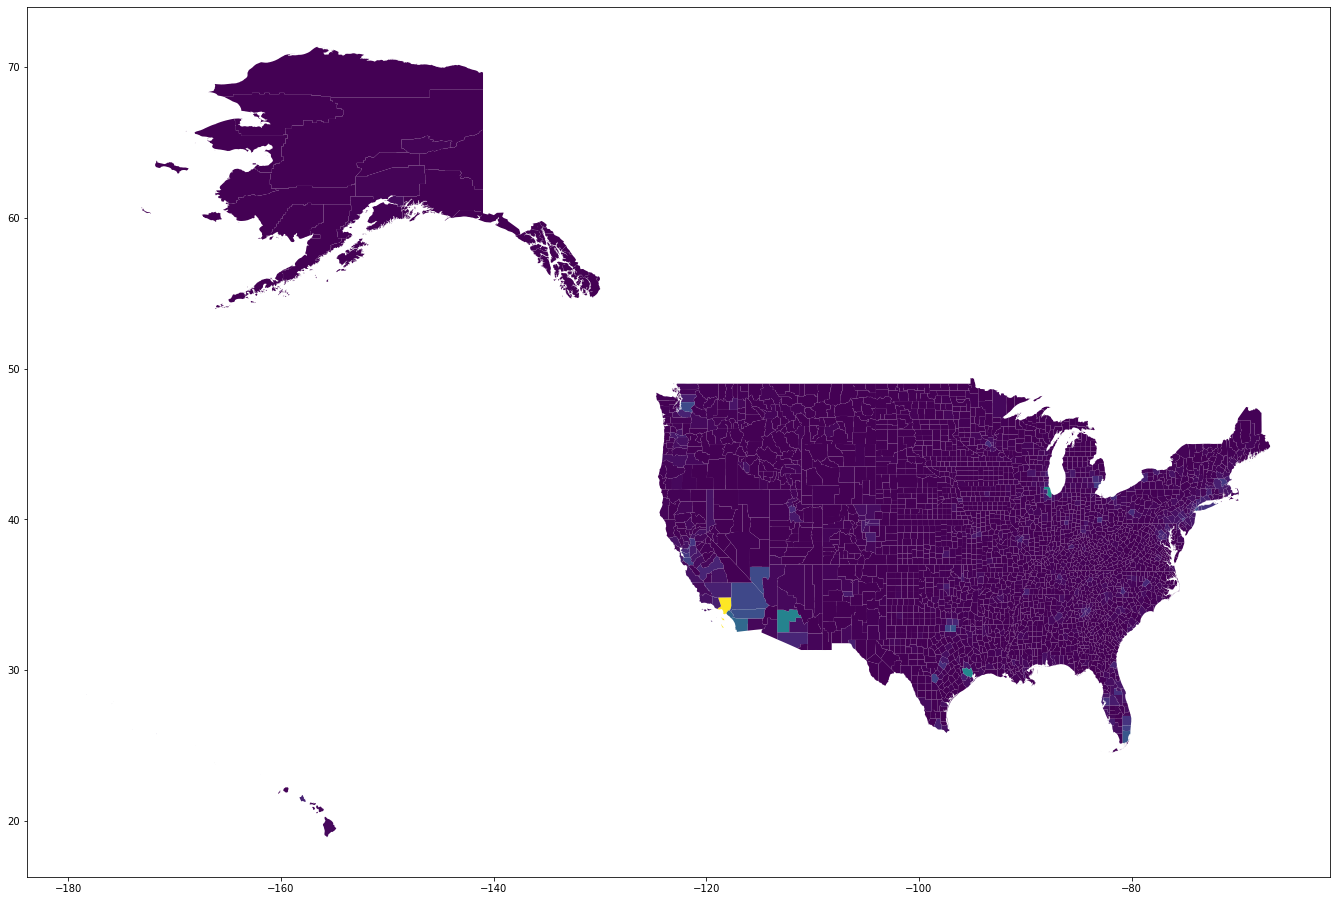

In [21]:
fig, ax = plt.subplots(figsize = (26,16))
map_data.plot(column = "Population", ax = ax)

In [22]:
years = list(full_df.groupby("TimePeriod").mean().index)
gdp_counties = list(full_df.groupby("GeoFips").mean().index)
map_counties = list(map_data.index)
shared_index = sorted(list(set.intersection(*map(set, [gdp_counties, map_counties]))))

In [23]:
map_dct = {}
for inpt in inputs:
    for suffix in ["", " 3YMA", " Volatility"]:
        name = inpt + suffix
        map_dct[name] =  map_data.loc[shared_index]

        for year in years:
            year_df = log_df[
                log_df.index.get_level_values("TimePeriod") == year].loc[shared_index]
            map_dct[name][year] = year_df.reset_index().set_index("GeoFips")[name].diff()

        print(map_dct[name])

           STATEFP COUNTYFP  COUNTYNS        AFFGEOID        NAME LSAD  \
fips_code                                                                
1001             1      001  00161526  0500000US01001     Autauga   06   
1003             1      003  00161527  0500000US01003     Baldwin   06   
1005             1      005  00161528  0500000US01005     Barbour   06   
1007             1      007  00161529  0500000US01007        Bibb   06   
1009             1      009  00161530  0500000US01009      Blount   06   
...            ...      ...       ...             ...         ...  ...   
56037           56      037  01609192  0500000US56037  Sweetwater   06   
56039           56      039  01605083  0500000US56039       Teton   06   
56041           56      041  01605084  0500000US56041       Uinta   06   
56043           56      043  01605085  0500000US56043    Washakie   06   
56045           56      045  01605086  0500000US56045      Weston   06   

                 ALAND      AWATER  P

           STATEFP COUNTYFP  COUNTYNS        AFFGEOID        NAME LSAD  \
fips_code                                                                
1001             1      001  00161526  0500000US01001     Autauga   06   
1003             1      003  00161527  0500000US01003     Baldwin   06   
1005             1      005  00161528  0500000US01005     Barbour   06   
1007             1      007  00161529  0500000US01007        Bibb   06   
1009             1      009  00161530  0500000US01009      Blount   06   
...            ...      ...       ...             ...         ...  ...   
56037           56      037  01609192  0500000US56037  Sweetwater   06   
56039           56      039  01605083  0500000US56039       Teton   06   
56041           56      041  01605084  0500000US56041       Uinta   06   
56043           56      043  01605085  0500000US56043    Washakie   06   
56045           56      045  01605086  0500000US56045      Weston   06   

                 ALAND      AWATER  P

           STATEFP COUNTYFP  COUNTYNS        AFFGEOID        NAME LSAD  \
fips_code                                                                
1001             1      001  00161526  0500000US01001     Autauga   06   
1003             1      003  00161527  0500000US01003     Baldwin   06   
1005             1      005  00161528  0500000US01005     Barbour   06   
1007             1      007  00161529  0500000US01007        Bibb   06   
1009             1      009  00161530  0500000US01009      Blount   06   
...            ...      ...       ...             ...         ...  ...   
56037           56      037  01609192  0500000US56037  Sweetwater   06   
56039           56      039  01605083  0500000US56039       Teton   06   
56041           56      041  01605084  0500000US56041       Uinta   06   
56043           56      043  01605085  0500000US56043    Washakie   06   
56045           56      045  01605086  0500000US56045      Weston   06   

                 ALAND      AWATER  P

In [26]:
map_dct.keys()

dict_keys(['All industry total', 'All industry total 3YMA', 'All industry total Volatility', 'Utilities', 'Utilities 3YMA', 'Utilities Volatility', 'Mining, quarrying, and oil and gas extraction', 'Mining, quarrying, and oil and gas extraction 3YMA', 'Mining, quarrying, and oil and gas extraction Volatility', 'Agriculture, forestry, fishing and hunting', 'Agriculture, forestry, fishing and hunting 3YMA', 'Agriculture, forestry, fishing and hunting Volatility'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

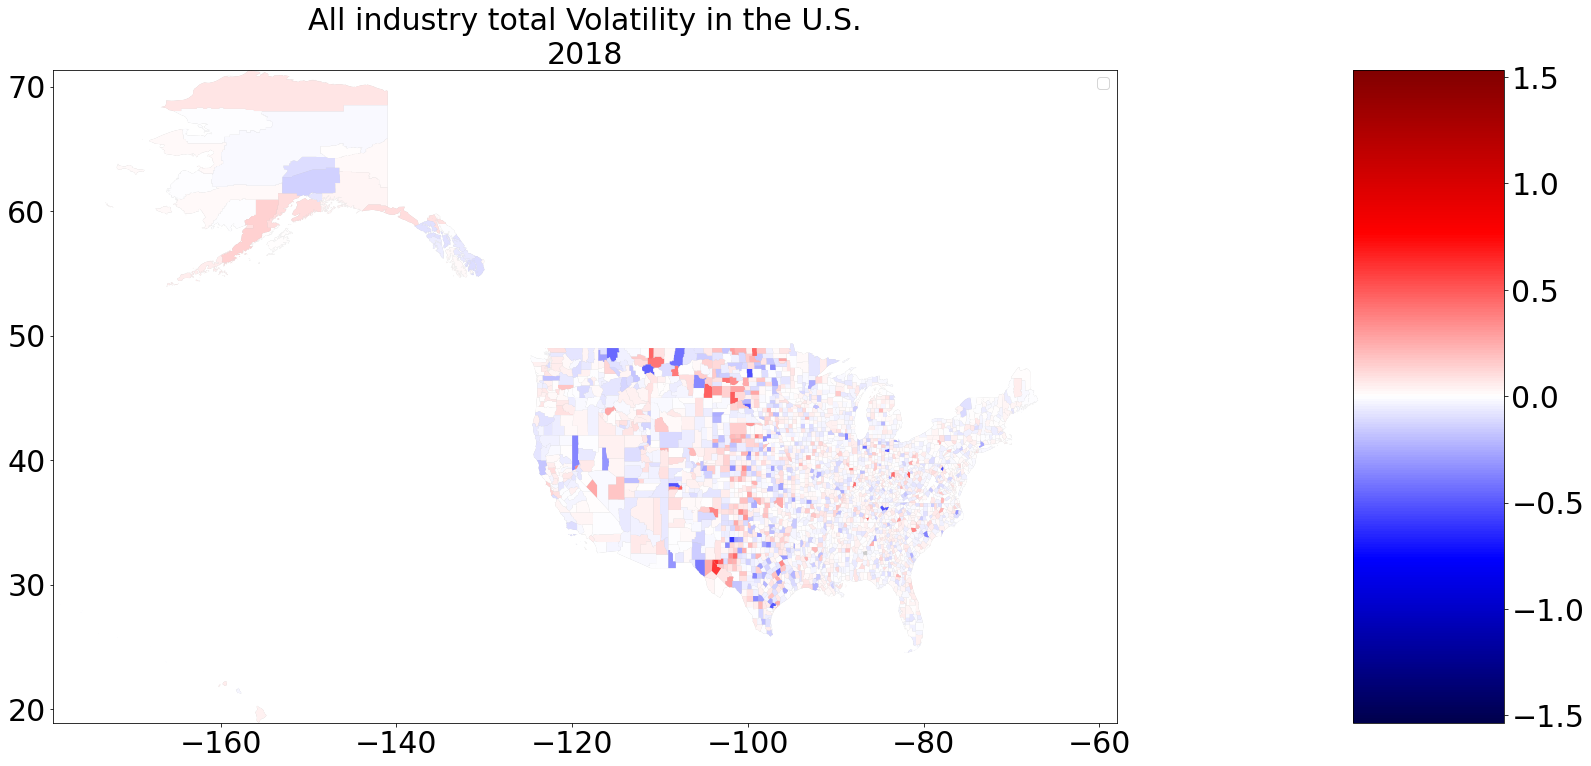

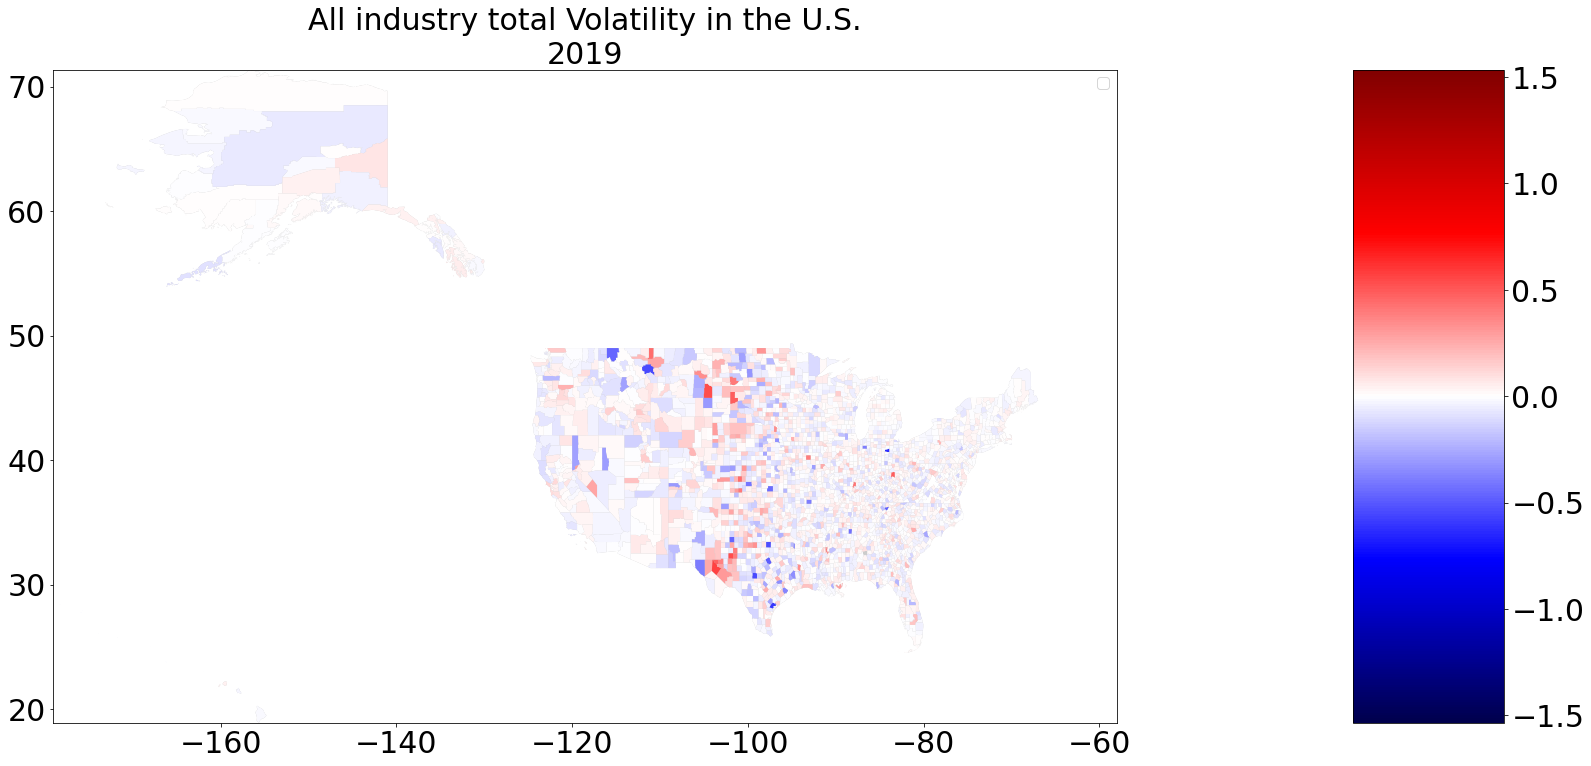

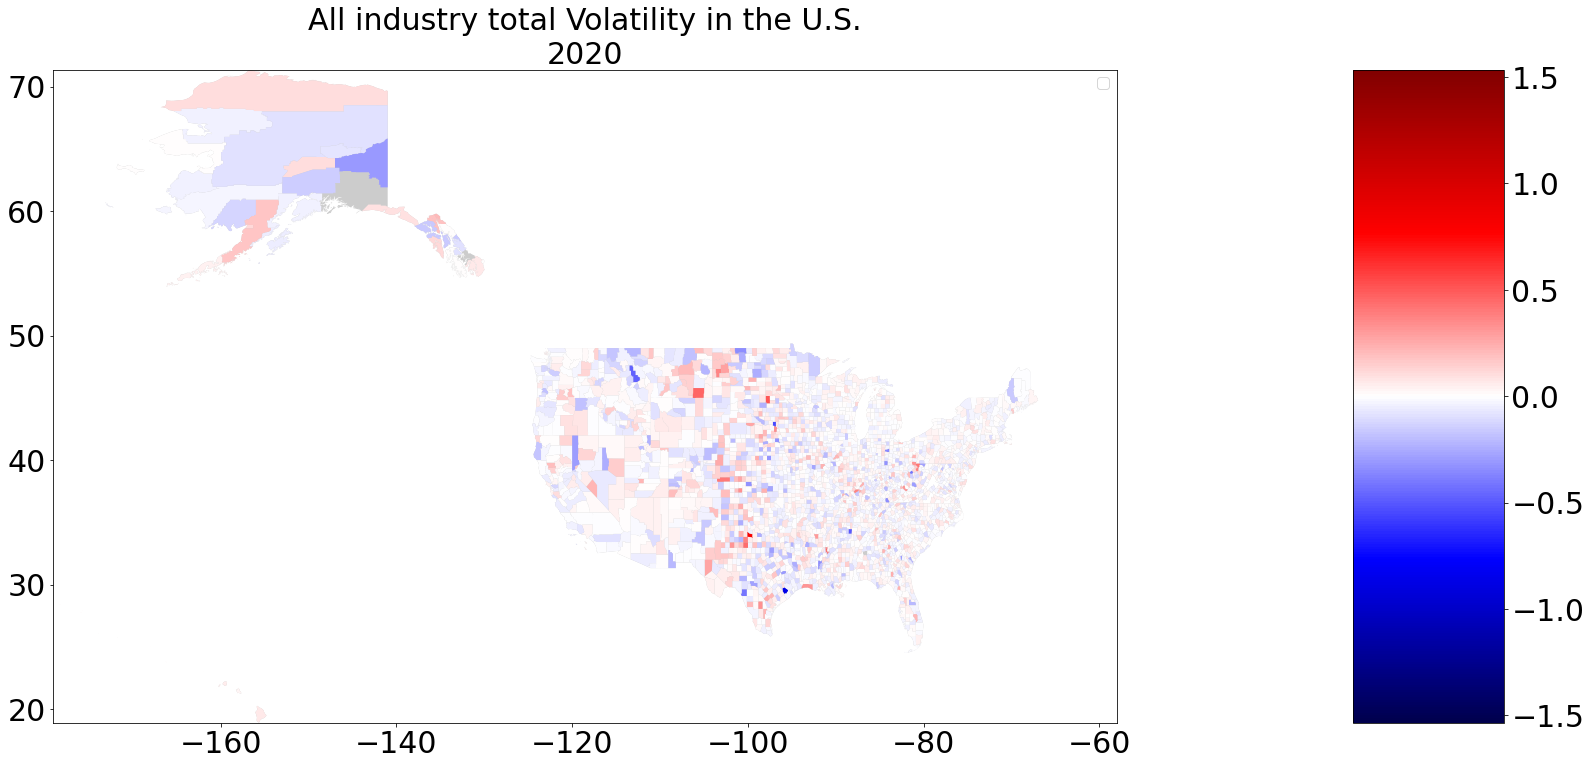

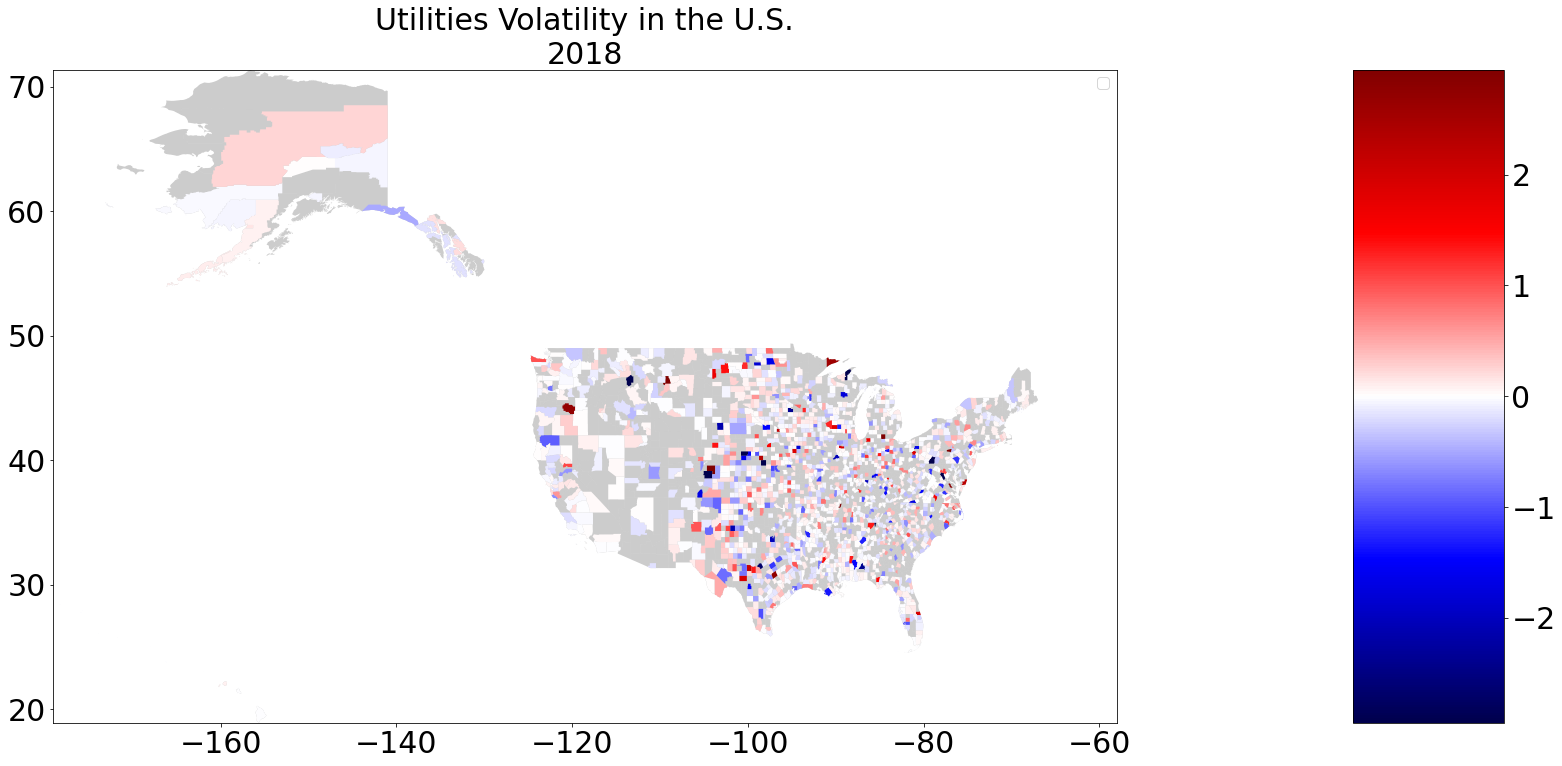

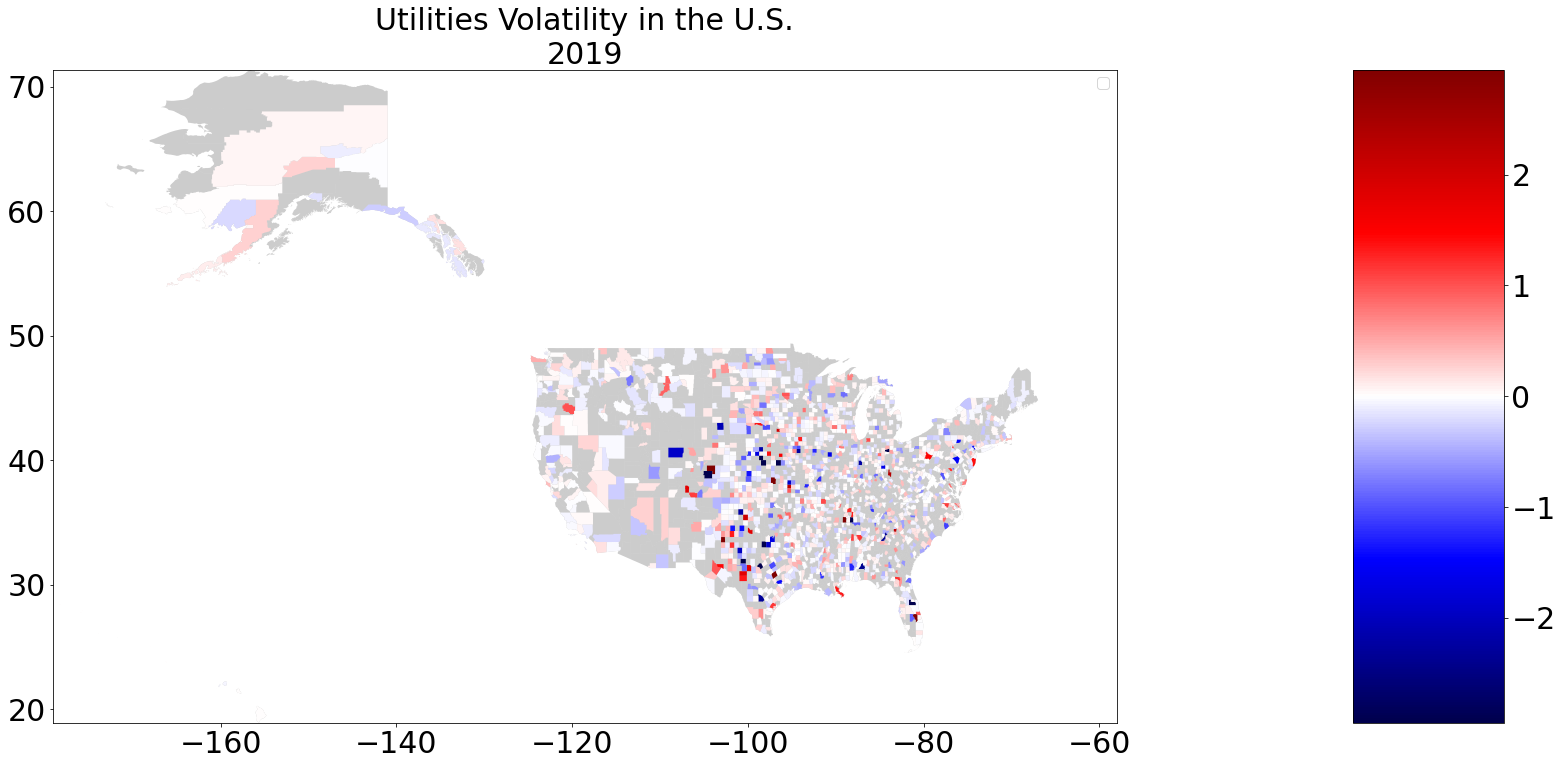

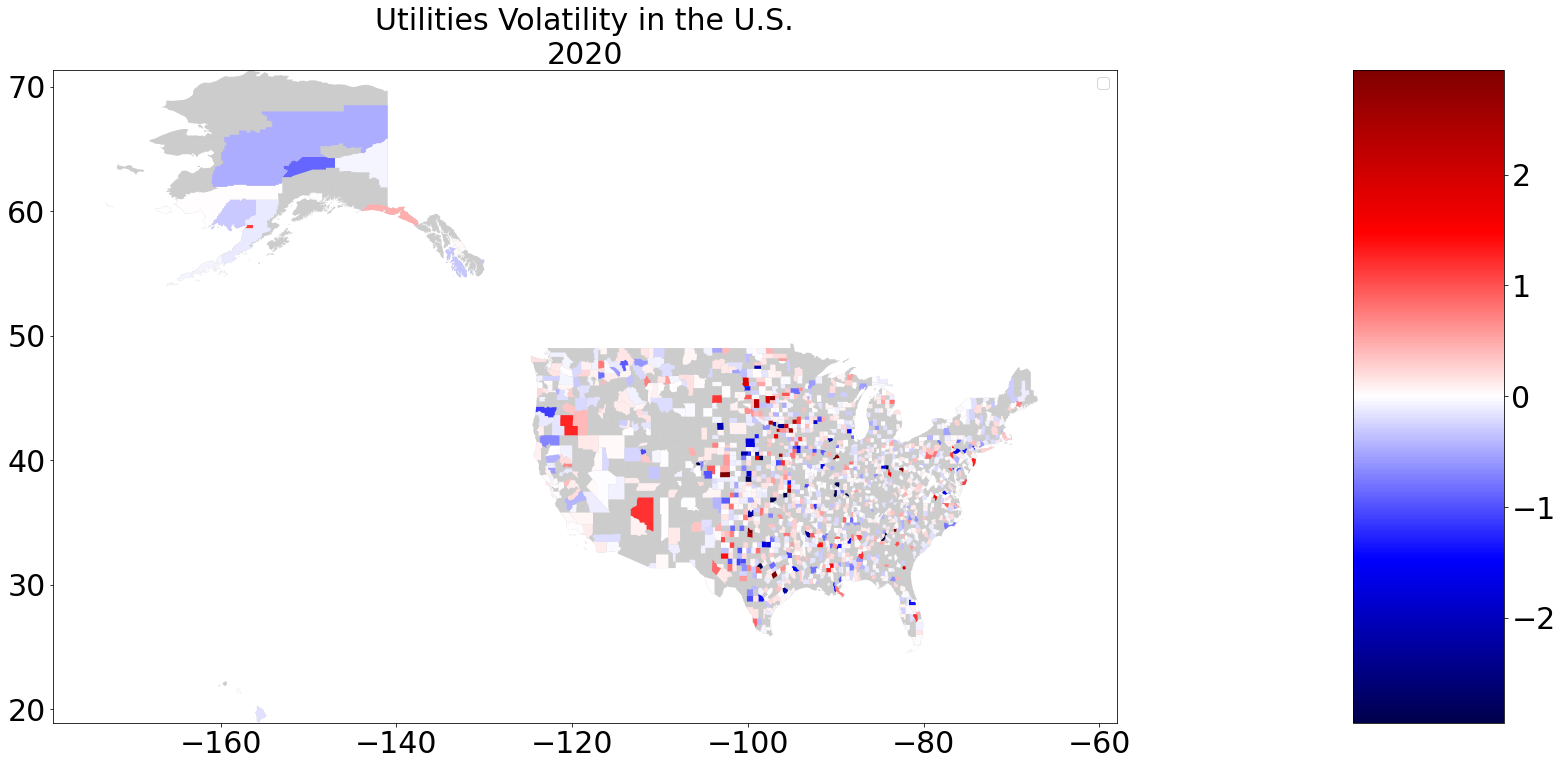

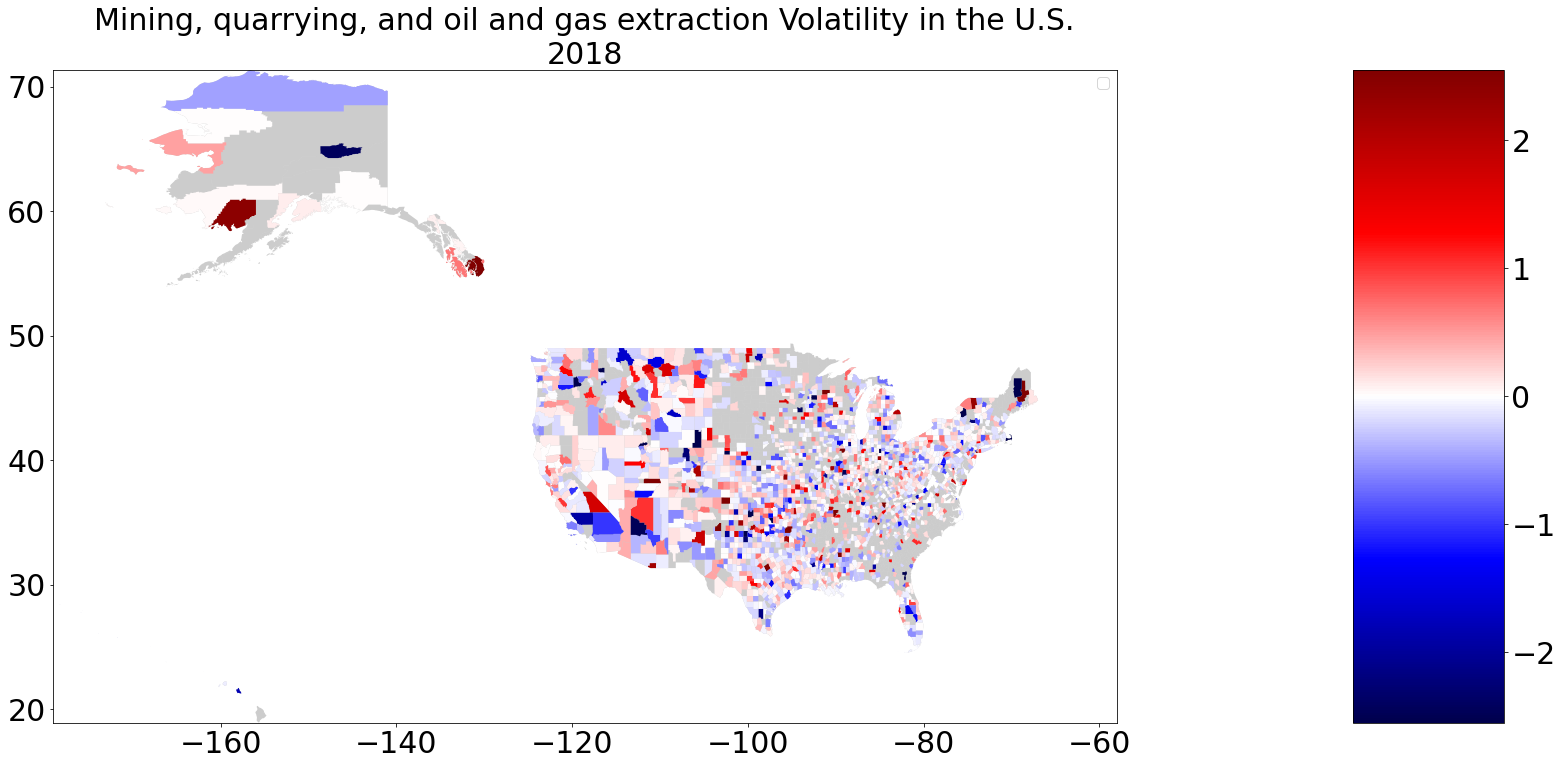

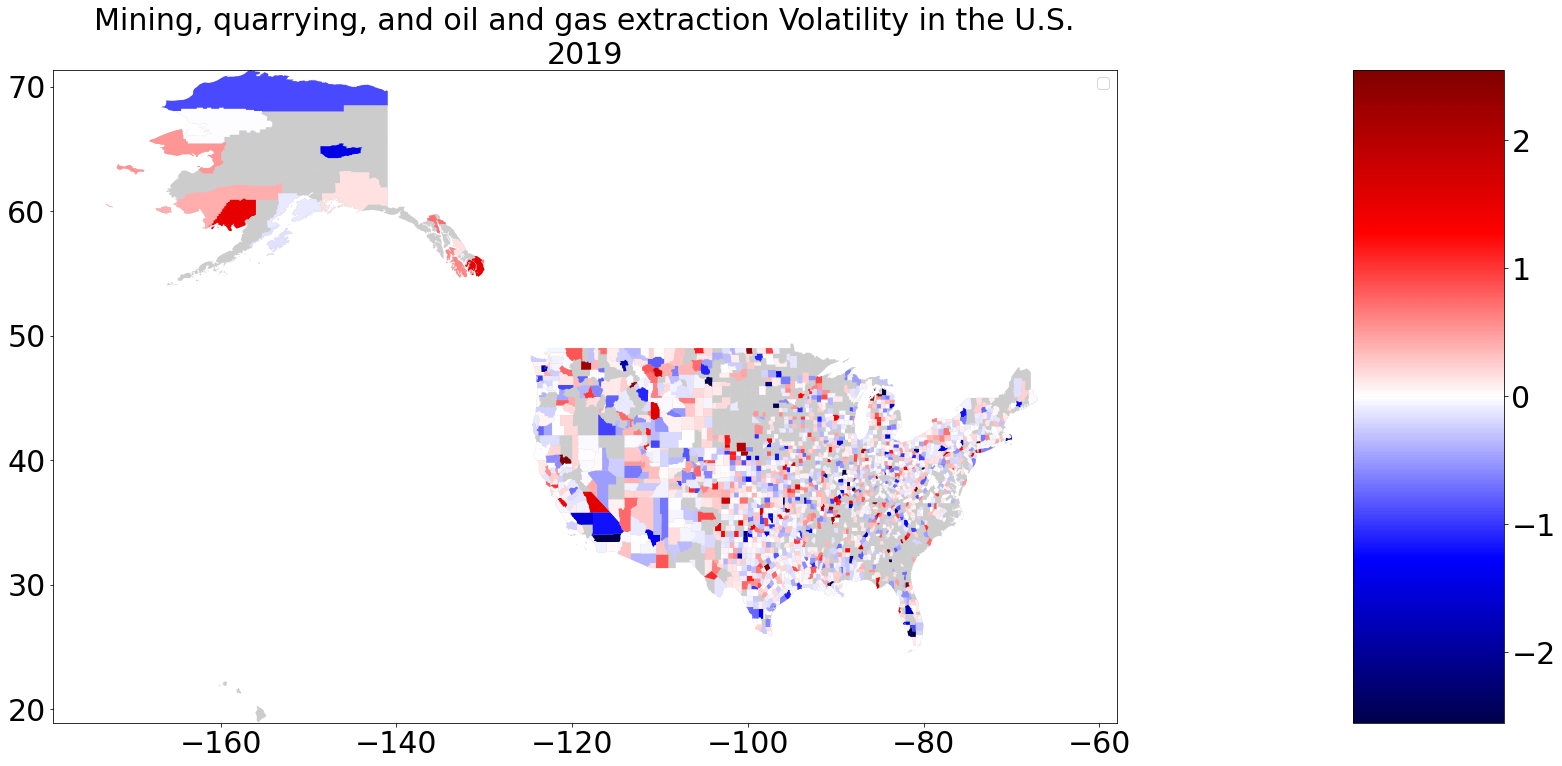

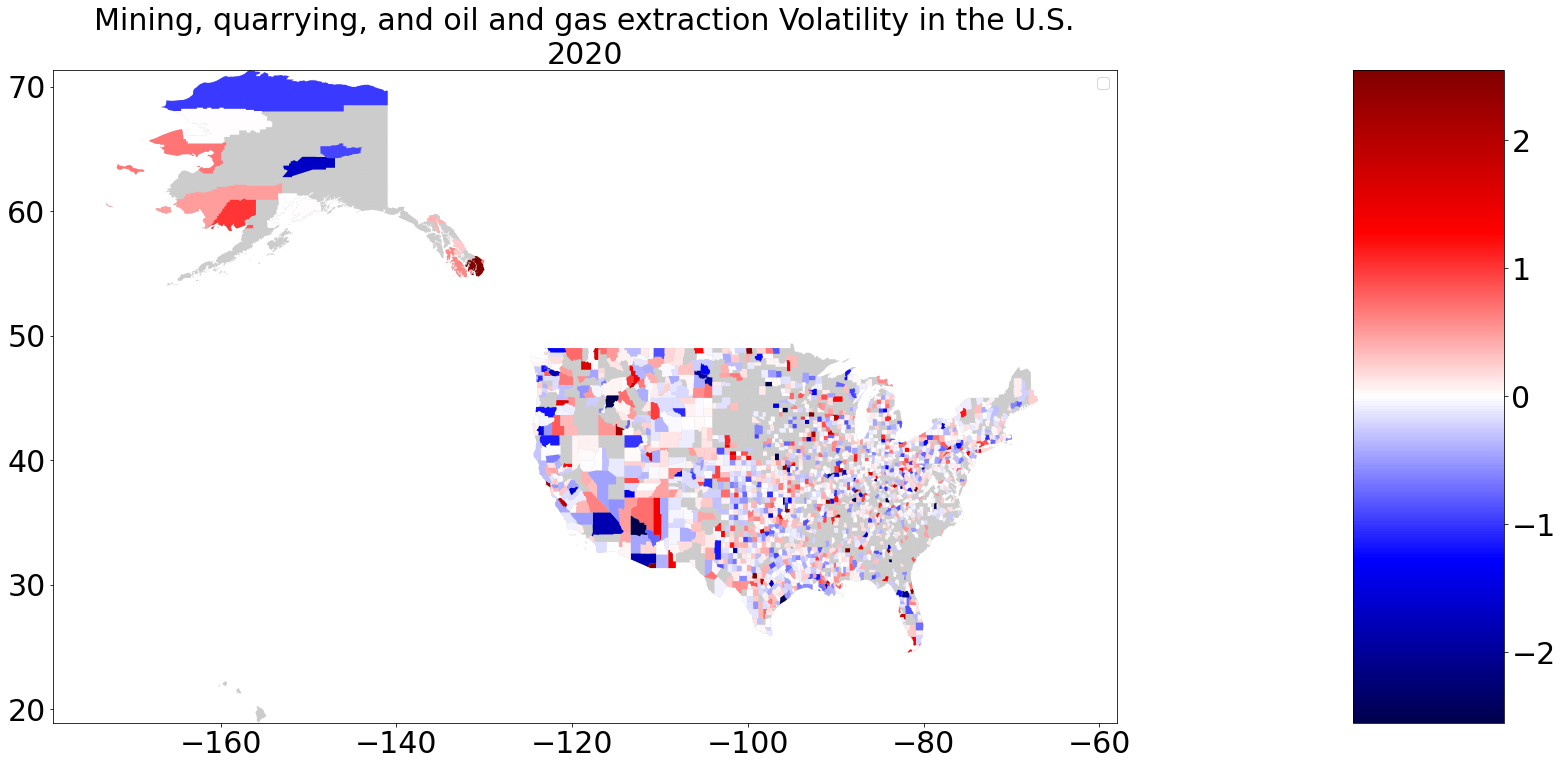

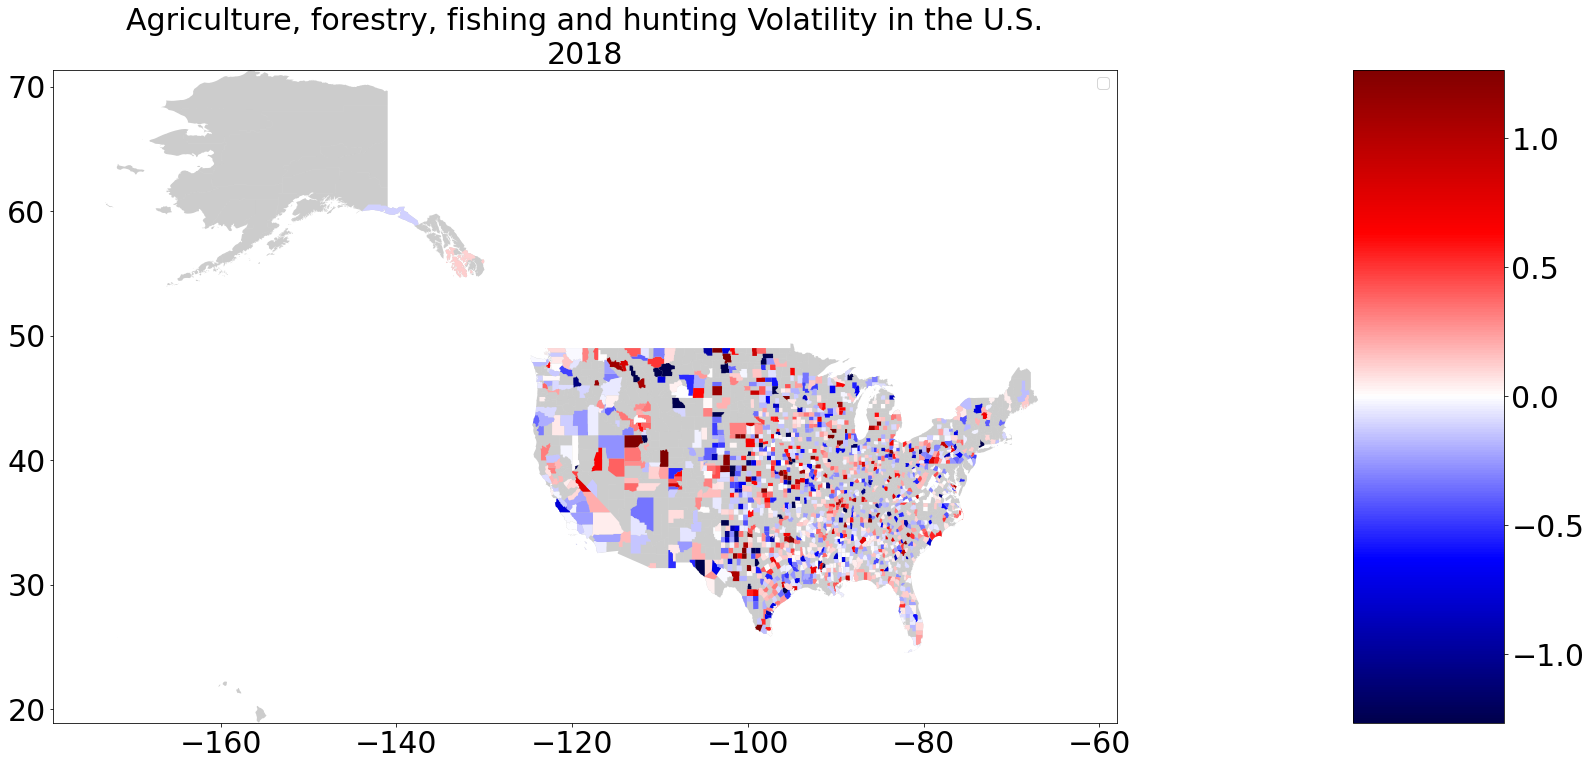

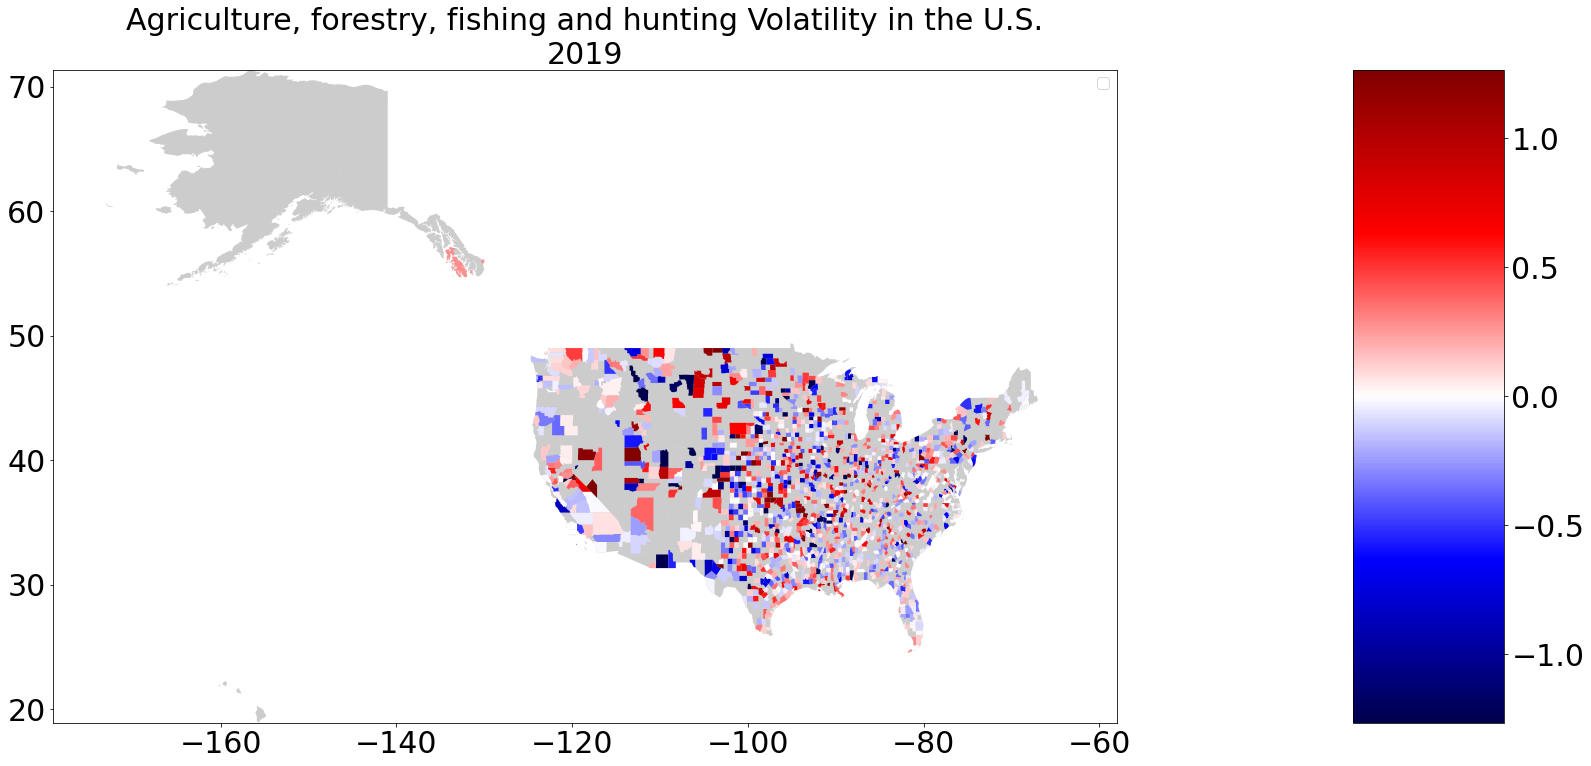

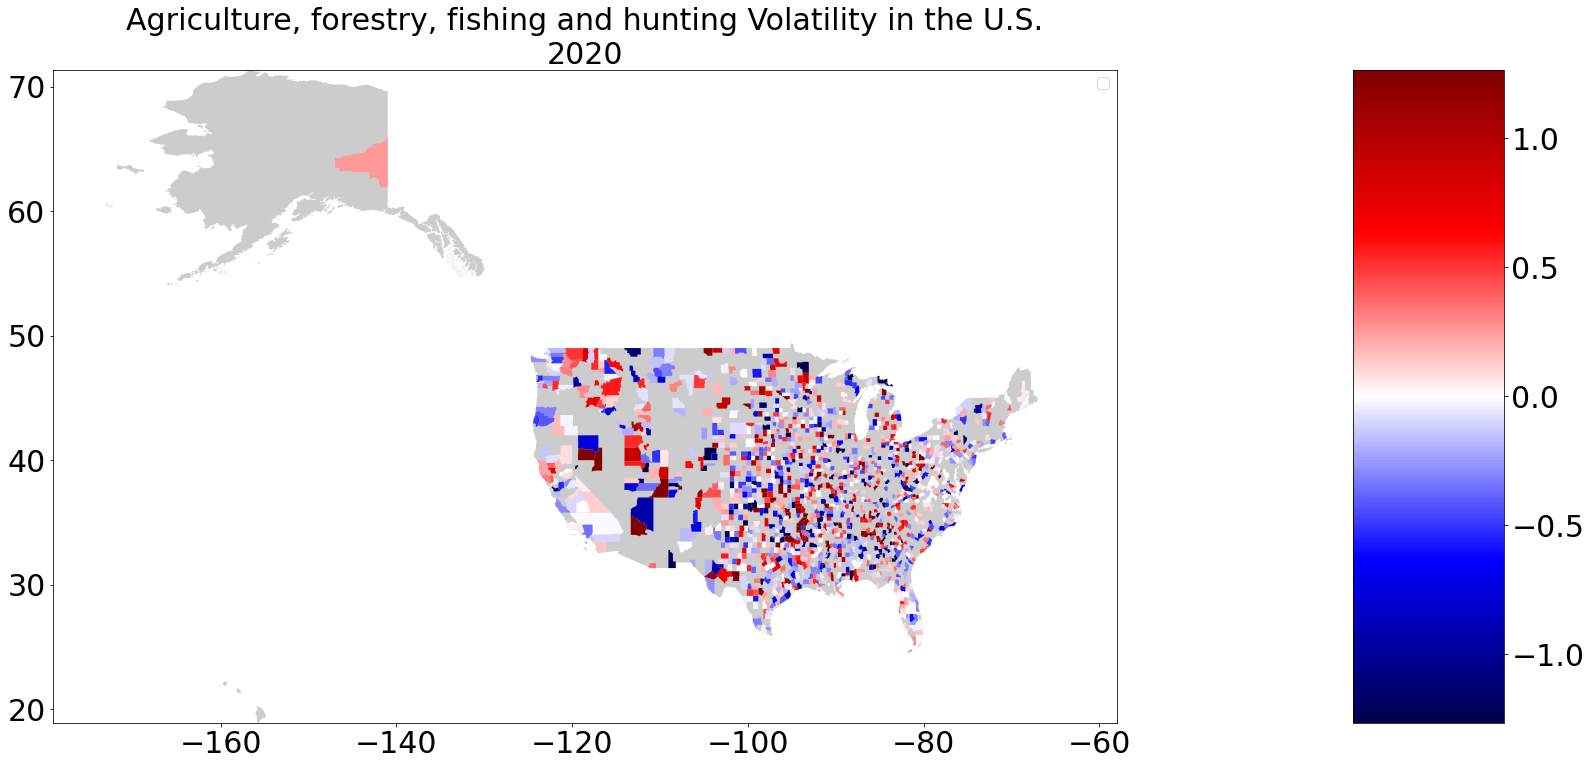

In [24]:
pd.set_option('use_inf_as_na',True)
plt.rcParams["font.size"] = 30
for inpt in inputs:
    for year in [2018, 2019, 2020]:
        key = inpt + " Volatility" 
        minmaxc = abs(map_dct[key][years]).max().max() / 4
        vmin, vmax = minmaxc * -1, minmaxc
        fig,ax = plt.subplots(figsize = (30, 30))
        plt.legend(prop={'size': 15})
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="10%", pad=0.2)
        ax.set_title(key + " in the U.S.\n" + str(year), fontsize = 30)
        map_dct[key].plot(color = "k", alpha = .2, ax = ax)
        map_dct[key].plot(column = year, ax=ax, legend=True,  cax=cax,cmap = "seismic", vmin = vmin, vmax = vmax)